<a href="https://colab.research.google.com/github/NARAYANAN0101/machine-learning-projects/blob/main/coffee_shop_slaes_predicition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [42]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [43]:
# Load the main dataset
df = pd.read_excel('/content/coffee_shop_sales_dataset.xlsx')
print(f"✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

✓ Dataset loaded successfully!
Dataset shape: (365, 26)
Date range: 2023-01-01 to 2023-12-31


In [44]:
df

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Pastry_Sales,Sandwich_Sales,Daily_Revenue,Staff_Cost,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,45,17,411.11,160,135.3,42.10,200,537.40,-126.28,6.3
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,16,7,205.12,320,58.7,57.80,200,636.50,-431.38,7.3
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,25,12,459.23,400,112.4,42.33,200,754.73,-295.51,7.6
3,2023-01-04,3,Wednesday,0,1,Winter,3.2,1,1.1,0,...,12,9,198.49,240,80.1,44.42,200,564.52,-366.03,4.8
4,2023-01-05,4,Thursday,0,1,Winter,-6.8,1,1.3,0,...,17,11,201.65,240,63.1,49.47,200,552.57,-350.92,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,3,Wednesday,0,12,Winter,-4.9,0,0.0,0,...,11,7,247.86,320,61.9,49.34,200,631.24,-383.38,5.9
361,2023-12-28,4,Thursday,0,12,Winter,7.5,0,0.0,0,...,18,11,320.52,320,95.1,42.13,200,657.23,-336.71,7.3
362,2023-12-29,5,Friday,0,12,Winter,15.9,0,0.0,0,...,22,17,362.91,240,108.5,50.17,200,598.67,-235.76,8.3
363,2023-12-30,6,Saturday,1,12,Winter,12.8,0,0.0,0,...,42,19,488.92,240,143.1,52.62,200,635.72,-146.80,6.4


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   365 non-null    object 
 1   Day_of_Week            365 non-null    int64  
 2   Day_Name               365 non-null    object 
 3   Is_Weekend             365 non-null    int64  
 4   Month                  365 non-null    int64  
 5   Season                 365 non-null    object 
 6   Temperature_C          365 non-null    float64
 7   Is_Raining             365 non-null    int64  
 8   Rainfall_mm            365 non-null    float64
 9   Is_Holiday             365 non-null    int64  
 10  Promotion_Active       365 non-null    int64  
 11  Nearby_Events          365 non-null    int64  
 12  Staff_Count            365 non-null    int64  
 13  Machine_Issues         365 non-null    int64  
 14  Num_Customers          365 non-null    int64  
 15  Coffee

In [46]:
df.isnull().sum()

,0
Date,0
Day_of_Week,0
Day_Name,0
Is_Weekend,0
Month,0
Season,0
Temperature_C,0
Is_Raining,0
Rainfall_mm,0
Is_Holiday,0


In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
# Create additional time-based features
df['Day_of_Year'] = df['Date'].dt.dayofyear
df['Week_of_Year'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter


In [50]:
df.head()

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Staff_Cost,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction,Day_of_Year,Week_of_Year,Quarter
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,160,135.3,42.10,200,537.40,-126.28,6.3,1,52,1
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,320,58.7,57.80,200,636.50,-431.38,7.3,2,1,1
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,400,112.4,42.33,200,754.73,-295.51,7.6,3,1,1
3,2023-01-04,3,Wednesday,0,1,Winter,3.2,1,1.1,0,...,240,80.1,44.42,200,564.52,-366.03,4.8,4,1,1
4,2023-01-05,4,Thursday,0,1,Winter,-6.8,1,1.3,0,...,240,63.1,49.47,200,552.57,-350.92,6.8,5,1,1


1)Encode categroical variables
2)fit-it is used to find the pattern or value
3)transform-it finds the value and  change it

In [51]:
# Encode categorical variables   #fit(), transform() fit_transform()
le = LabelEncoder()
df['Day_Name_Encoded'] = le.fit_transform(df['Day_Name'])
df['Season_Encoded'] = le.fit_transform(df['Season'])

In [52]:
# Select features for modeling (exclude target and non-predictive columns)
exclude_cols = ['Date', 'Day_Name', 'Season', 'Daily_Revenue', 'Staff_Cost',
                'Ingredient_Cost', 'Utilities_Cost', 'Rent_Cost', 'Total_Costs',
                'Daily_Profit']
feature_cols = [col for col in df.columns if col not in exclude_cols]
X = df[feature_cols]
y = df['Daily_Revenue']

In [53]:
print(f"✓ Features selected: {len(feature_cols)} columns")
print(f"✓ Target variable: Daily_Revenue")

✓ Features selected: 21 columns
✓ Target variable: Daily_Revenue


In [54]:
# Display feature list
print("\n📋 Features used in model:")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col}")


📋 Features used in model:
 1. Day_of_Week
 2. Is_Weekend
 3. Month
 4. Temperature_C
 5. Is_Raining
 6. Rainfall_mm
 7. Is_Holiday
 8. Promotion_Active
 9. Nearby_Events
10. Staff_Count
11. Machine_Issues
12. Num_Customers
13. Coffee_Sales
14. Pastry_Sales
15. Sandwich_Sales
16. Customer_Satisfaction
17. Day_of_Year
18. Week_of_Year
19. Quarter
20. Day_Name_Encoded
21. Season_Encoded


In [55]:
# Basic statistics
print("\nTarget Variable (Daily_Revenue) Statistics:")
print(f"Mean: ${y.mean():.2f}")
print(f"Median: ${y.median():.2f}")
print(f"Std Dev: ${y.std():.2f}")
print(f"Min: ${y.min():.2f}")
print(f"Max: ${y.max():.2f}")



Target Variable (Daily_Revenue) Statistics:
Mean: $318.04
Median: $313.43
Std Dev: $104.61
Min: $50.00
Max: $698.79


In [56]:
# Correlation analysis
print("\n🔗 Top 10 Features Correlated with Daily Revenue:")
correlations = df[feature_cols + ['Daily_Revenue']].corr()['Daily_Revenue'].sort_values(ascending=False)
print(correlations.head(11)[1:])  # Exclude self-correlation


🔗 Top 10 Features Correlated with Daily Revenue:
Coffee_Sales             0.850058
Num_Customers            0.826685
Pastry_Sales             0.709539
Sandwich_Sales           0.599494
Nearby_Events            0.314505
Customer_Satisfaction    0.310457
Is_Weekend               0.309296
Day_of_Week              0.272246
Temperature_C            0.269180
Staff_Count              0.266494
Name: Daily_Revenue, dtype: float64


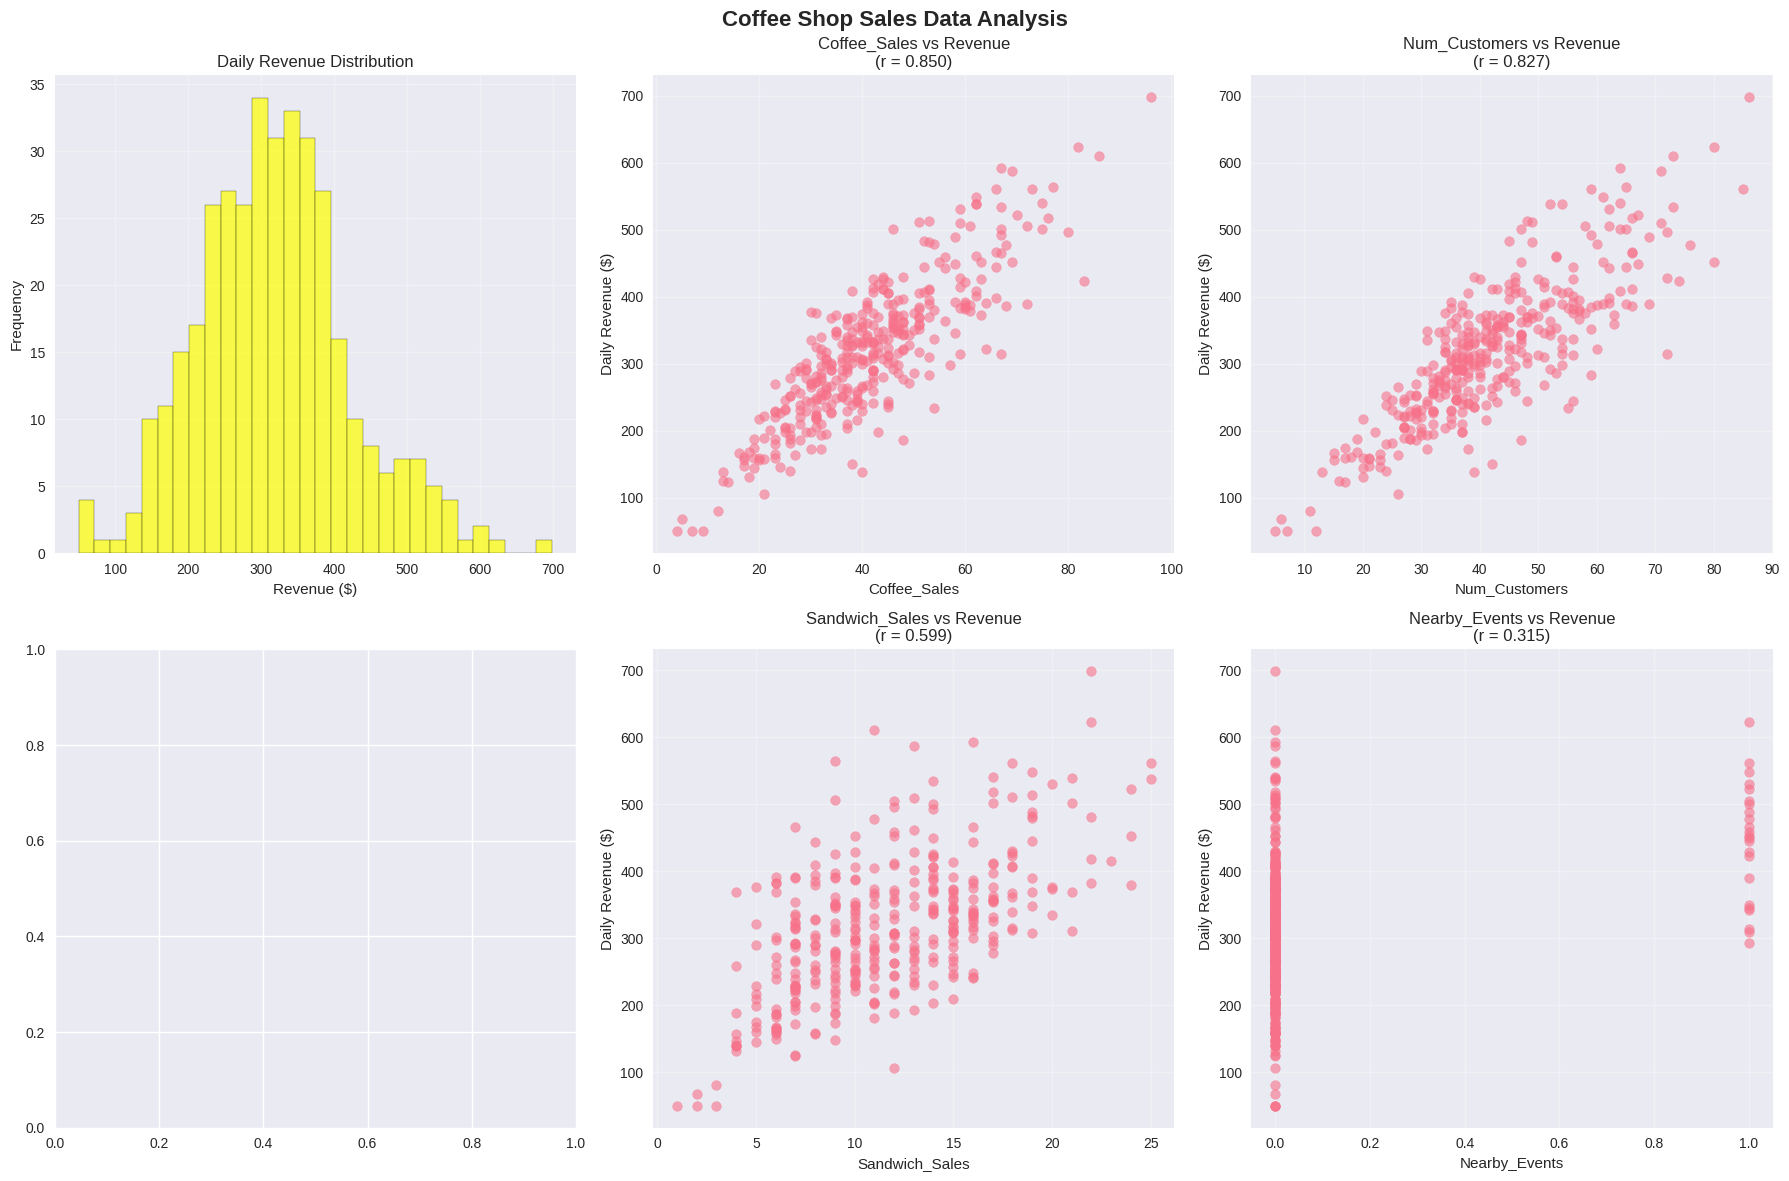

"You're getting the top 5 features most correlated with Daily Revenue.\n\n.head(6) picks top 6 (including the revenue itself), then [1:] skips the first (self-correlation).\nenumerate(top_features)\n➔ Loop over the features with their index.\n\nif i < 5:\n➔ Only do this for the top 5 features.\n\nrow = i // 3 and col = (i + 1) % 3\n➔ Smart way to position the scatter plots in the 2×3 grid without overlapping the histogram at (0, 0).\n\nif row == 0 and col == 0:\n➔ Skip the position (0, 0) since it's already used by histogram.\n\nscatter(df[feature], y, alpha=0.6)\n➔ Scatter plot of feature vs Daily Revenue with some transparency.\n\n.set_title()\n➔ Title includes correlation coefficient (r value) with revenue.\n\nplt.tight_layout()\n➔ Adjusts spacing so labels and titles don't overlap.\n\nplt.show()\n➔ Displays the figure."

In [57]:

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Coffee Shop Sales Data Analysis', fontsize=16, fontweight='bold')

"""plt.subplots(2, 3)
➔ Creates a grid of 2 rows and 3 columns of subplots (total 6 plots).
➔ axes is a 2D array of axes objects for each subplot.

figsize=(18, 12)
➔ Size of the overall figure (18 inches wide x 12 inches tall).

fig.suptitle()
➔ Adds a big main title on top of the entire figure.
"""

# Revenue distribution
axes[0, 0].hist(y, bins=30, alpha=0.7, color='yellow', edgecolor='black')
axes[0, 0].set_title('Daily Revenue Distribution')
axes[0, 0].set_xlabel('Revenue ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

"""axes[0, 0]
➔ Refers to the subplot at first row, first column.

.hist(y, bins=30)
➔ Plots a histogram of the Daily Revenue with 30 bins.

alpha=0.7
➔ Transparency of the histogram bars.

color='brown', edgecolor='black'
➔ Brown bars with black edges for better visibility.

grid(True, alpha=0.3)
➔ Adds gridlines to the plot with light transparency."""

# Top correlations
top_features = correlations.head(6)[1:].index  # Top 5 excluding self
for i, feature in enumerate(top_features):
    if i < 5:
        row = i // 3
        col = (i + 1) % 3
        if row == 0 and col == 0:
            continue  # Skip first position (already used)
        axes[row, col].scatter(df[feature], y, alpha=0.6)
        axes[row, col].set_title(f'{feature} vs Revenue\n(r = {correlations[feature]:.3f})')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Daily Revenue ($)')
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

"""You're getting the top 5 features most correlated with Daily Revenue.

.head(6) picks top 6 (including the revenue itself), then [1:] skips the first (self-correlation).
enumerate(top_features)
➔ Loop over the features with their index.

if i < 5:
➔ Only do this for the top 5 features.

row = i // 3 and col = (i + 1) % 3
➔ Smart way to position the scatter plots in the 2×3 grid without overlapping the histogram at (0, 0).

if row == 0 and col == 0:
➔ Skip the position (0, 0) since it's already used by histogram.

scatter(df[feature], y, alpha=0.6)
➔ Scatter plot of feature vs Daily Revenue with some transparency.

.set_title()
➔ Title includes correlation coefficient (r value) with revenue.

plt.tight_layout()
➔ Adjusts spacing so labels and titles don't overlap.

plt.show()
➔ Displays the figure."""


 Top 10 Features for heatmap:['Coffee_Sales', 'Num_Customers', 'Pastry_Sales', 'Sandwich_Sales', 'Nearby_Events', 'Customer_Satisfaction', 'Is_Weekend', 'Day_of_Week', 'Temperature_C', 'Staff_Count']


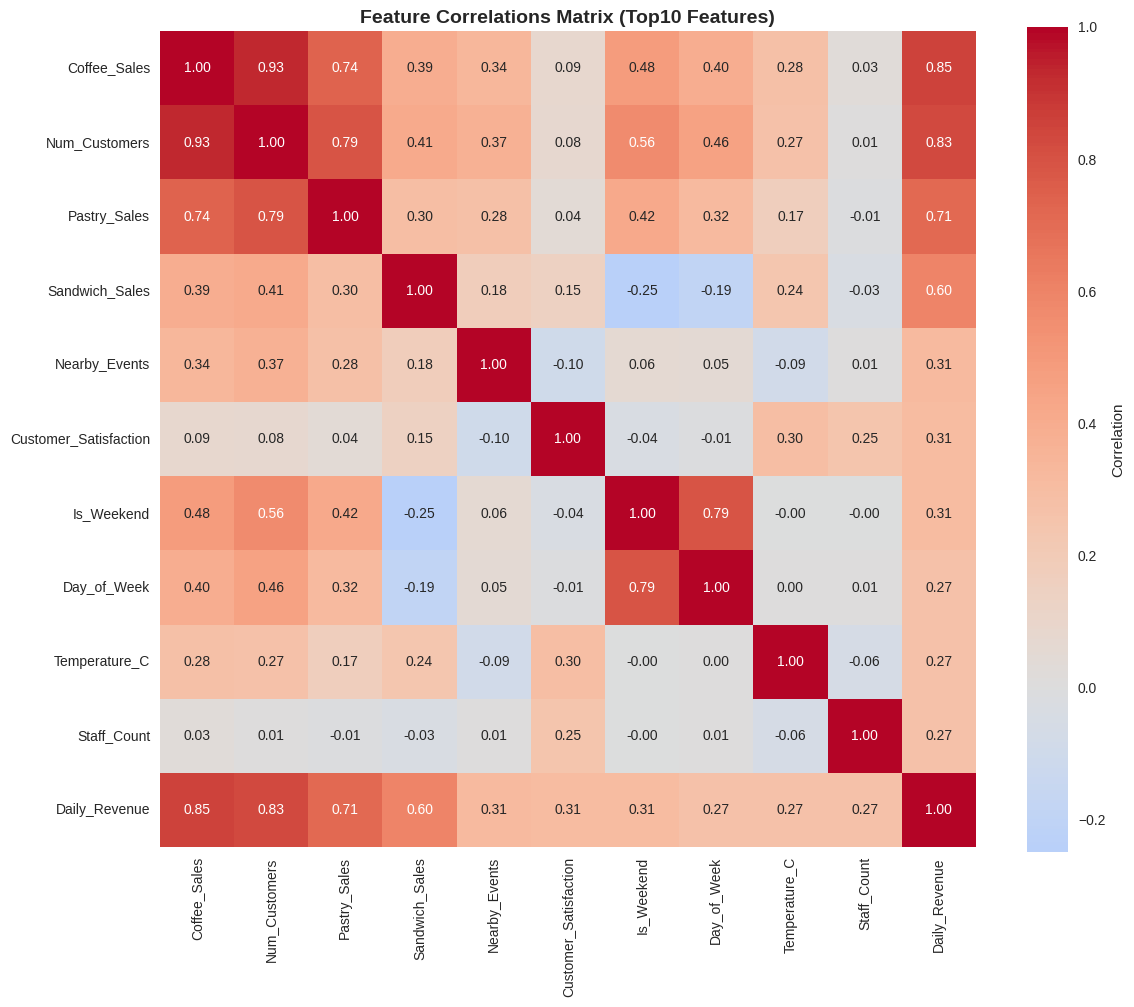

In [60]:
#Feature correlation heatmap
plt.figure(figsize=(12, 10))
#Select subset of most important features for readablility
important_features=correlations.head(11)[1:].index[:10]
print(f"\n Top 10 Features for heatmap:{list(important_features)}")
corr_matrix=df[list(important_features) + ['Daily_Revenue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",center=0,square=True,cbar_kws={'label':'Correlation'})
plt.title('Feature Correlations Matrix (Top10 Features)',fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

In [62]:
#split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=None)

print(f"\b Data Split:")
print(f"train set: {X_train.shape[0]} samples")
print(f"test set: {X_test.shape[0]} samples")

 Data Split:
train set: 292 samples
test set: 73 samples


What is feature scaling?
Feature scaling means bringing all input features to the same scale ,usally with mean=0 and standard deivation =q

In [63]:
#Feature scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [64]:
X_train_scaled

array([[-1.51551436, -0.64080264,  0.12558378, ...,  0.43428383,
        -0.94381775,  0.51017365],
       [-0.02216163, -0.64080264,  1.61625303, ...,  1.3465923 ,
         0.56767101,  1.41853161],
       [ 0.97340686,  1.56054289,  0.12558378, ...,  0.43428383,
        -0.43998817,  0.51017365],
       ...,
       [-0.02216163, -0.64080264,  0.72185148, ...,  0.43428383,
         0.56767101, -1.30654228],
       [ 0.47562262, -0.64080264,  1.61625303, ...,  1.3465923 ,
        -1.44764734,  1.41853161],
       [-0.02216163, -0.64080264, -0.76881777, ..., -0.47802464,
         0.56767101, -0.39818431]])

In [67]:
print(" Features scaling using standardscalar")
#Feature selection(optional-select top k features)
selector=SelectKBest(score_func=f_regression,k=10) #Selection top 15 features
X_train_selected=selector.fit_transform(X_train_scaled,y_train)
X_test_selected=selector.transform(X_test_scaled)

Select_features=X.columns[selector.get_support()]
print(f"\n Feature Selection:Top {len(Select_features)} features selected")
print(f"Selected Features:",list(Select_features))

 Features scaling using standardscalar

 Feature Selection:Top 10 features selected
Selected Features: ['Is_Weekend', 'Temperature_C', 'Is_Raining', 'Rainfall_mm', 'Nearby_Events', 'Num_Customers', 'Coffee_Sales', 'Pastry_Sales', 'Sandwich_Sales', 'Customer_Satisfaction']


In [68]:
#create and train the linear regression model
print("\n Trainning Linear regression model:")
model=LinearRegression()
model.fit(X_train_selected,y_train)
print(" /Model trained successfully")

LinearRegression()

In [69]:
#Make predictions
y_pred_test=model.predict(X_test_selected)
y_pred_train=model.predict(X_train_selected)


In [74]:
#calculate comprehensive metircs
def calculate_metrics(y_true,y_pred,dataset_name):
    mse=mean_squared_error(y_true,y_pred)
    root_mean_squared_error=np.sqrt(mse)
    mae=mean_absolute_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)

    #additional metrics

    mape=np.mean(np.abs((y_true-y_pred)/y_true))*100

    print(f"\n{dataset_name} set performance:")
    print(f"MSE$: {mse:.2f}")
    print(f"RMSE$: {root_mean_squared_error:.2f}")
    print(f"MAE$: {mae:.2f}")
    print(f"R2: {r2:.2f}")
    print(f"MAPE: {mape:.2f}%")

    return {"MSE":mse,'RMSE':root_mean_squared_error,'MAE':mae,'R2':r2,'MAPE':mape}


In [75]:
#Evalute model performance
train_metrics=calculate_metrics(y_train,y_pred_train,'Train')
test_metrics=calculate_metrics(y_test,y_pred_test,'Test')


Train set performance:
MSE$: 1319.88
RMSE$: 36.33
MAE$: 28.24
R2: 0.87
MAPE: 9.33%

Test set performance:
MSE$: 2038.35
RMSE$: 45.15
MAE$: 34.30
R2: 0.83
MAPE: 14.98%


In [76]:
#check for overfitting
print(f"\n Overfitting check")
print(f"R2 difference (Train -Test):{train_metrics['R2'] - test_metrics['R2']:.4f}")
if abs(train_metrics['R2']-test_metrics['R2'])<0.05:
  print(" Model apperas to generalizes well (low overfitting)")
else:
  print("Potential overfitting detected")



 Overfitting check
R2 difference (Train -Test):0.0443
 Model apperas to generalizes well (low overfitting)


In [78]:
#Feature importance analysis
feature_importance=pd.DataFrame({'Feature':Select_features,'Coefficient':model.coef_,'Abs_Coefficient':np.abs(model.coef_)
                                 }).sort_values(by='Coefficient',ascending=False)

print(f"\n Feature Importance:")
print(feature_importance)


 Feature Importance:
                 Feature  Coefficient  Abs_Coefficient
6           Coffee_Sales    60.188425        60.188425
8         Sandwich_Sales    31.819211        31.819211
9  Customer_Satisfaction    22.714791        22.714791
7           Pastry_Sales    21.075364        21.075364
0             Is_Weekend     4.182330         4.182330
3            Rainfall_mm     1.695007         1.695007
4          Nearby_Events     0.685015         0.685015
2             Is_Raining    -1.410831         1.410831
5          Num_Customers    -2.124622         2.124622
1          Temperature_C    -6.081307         6.081307


In [81]:
# Model interpretation
print(f"\n Model Interpretation:")
print("Model Equation:{model.intercept_.2f}")


 Model Interpretation:
Model Equation:{model.intercept_.2f}


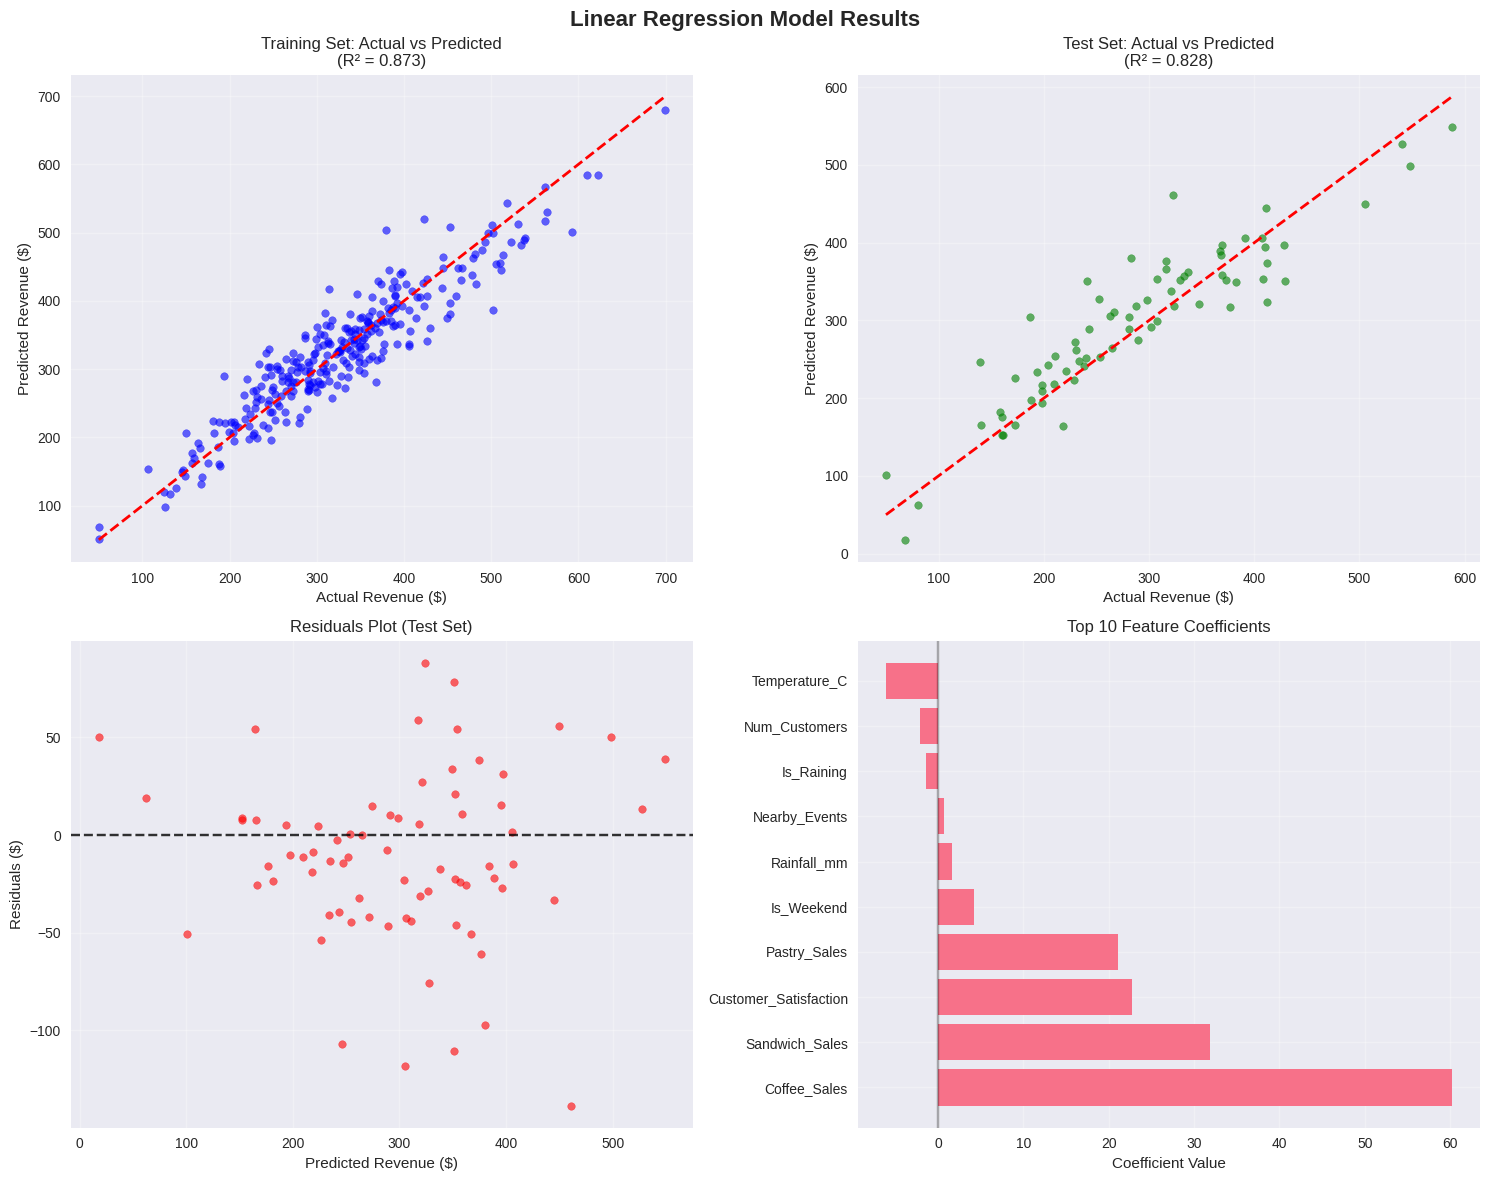

In [82]:
# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Linear Regression Model Results', fontsize=16, fontweight='bold')

# Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_pred_train, alpha=0.6, color='blue', s=30)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Revenue ($)')
axes[0, 0].set_ylabel('Predicted Revenue ($)')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\n(R² = {train_metrics["R2"]:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Actual vs Predicted (Testing)
axes[0, 1].scatter(y_test, y_pred_test, alpha=0.6, color='green', s=30)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Revenue ($)')
axes[0, 1].set_ylabel('Predicted Revenue ($)')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\n(R² = {test_metrics["R2"]:.3f})')
axes[0, 1].grid(True, alpha=0.3)

# Residuals plot
residuals_test = y_test - y_pred_test
axes[1, 0].scatter(y_pred_test, residuals_test, alpha=0.6, color='red', s=30)
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.8)
axes[1, 0].set_xlabel('Predicted Revenue ($)')
axes[1, 0].set_ylabel('Residuals ($)')
axes[1, 0].set_title('Residuals Plot (Test Set)')
axes[1, 0].grid(True, alpha=0.3)

# Feature importance
top_features_plot = feature_importance.head(10)
axes[1, 1].barh(range(len(top_features_plot)), top_features_plot['Coefficient'])
axes[1, 1].set_yticks(range(len(top_features_plot)))
axes[1, 1].set_yticklabels(top_features_plot['Feature'])
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_title('Top 10 Feature Coefficients')
axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [83]:
# Example predictions
print(f"\n🔮 Example Predictions:")
print("-" * 40)

# Create sample scenarios
scenarios = [
    {
        'name': 'Perfect Weekend Day',
        'data': {
            'Day_of_Week': 7, 'Is_Weekend': 1, 'Month': 6, 'Temperature_C': 25,
            'Is_Raining': 0, 'Rainfall_mm': 0, 'Is_Holiday': 0, 'Promotion_Active': 1,
            'Nearby_Events': 1, 'Staff_Count': 5, 'Machine_Issues': 0, 'Num_Customers': 70,
            'Coffee_Sales': 85, 'Pastry_Sales': 45, 'Sandwich_Sales': 25,
            'Customer_Satisfaction': 9.0, 'Day_of_Year': 150, 'Week_of_Year': 25,
            'Quarter': 2, 'Day_Name_Encoded': 6, 'Season_Encoded': 3
        }
    },
    {
        'name': 'Rainy Weekday',
        'data': {
            'Day_of_Week': 2, 'Is_Weekend': 0, 'Month': 11, 'Temperature_C': 8,
            'Is_Raining': 1, 'Rainfall_mm': 5.5, 'Is_Holiday': 0, 'Promotion_Active': 0,
            'Nearby_Events': 0, 'Staff_Count': 3, 'Machine_Issues': 0, 'Num_Customers': 25,
            'Coffee_Sales': 30, 'Pastry_Sales': 15, 'Sandwich_Sales': 8,
            'Customer_Satisfaction': 6.5, 'Day_of_Year': 300, 'Week_of_Year': 45,
            'Quarter': 4, 'Day_Name_Encoded': 1, 'Season_Encoded': 0
        }
    },
    {
        'name': 'Average Day',
        'data': {
            'Day_of_Week': 4, 'Is_Weekend': 0, 'Month': 4, 'Temperature_C': 18,
            'Is_Raining': 0, 'Rainfall_mm': 0, 'Is_Holiday': 0, 'Promotion_Active': 0,
            'Nearby_Events': 0, 'Staff_Count': 3, 'Machine_Issues': 0, 'Num_Customers': 45,
            'Coffee_Sales': 50, 'Pastry_Sales': 22, 'Sandwich_Sales': 15,
            'Customer_Satisfaction': 7.5, 'Day_of_Year': 100, 'Week_of_Year': 15,
            'Quarter': 2, 'Day_Name_Encoded': 3, 'Season_Encoded': 2
        }
    }
]

for scenario in scenarios:
    sample_df = pd.DataFrame([scenario['data']])
    sample_scaled = scaler.transform(sample_df)
    sample_selected = selector.transform(sample_scaled)
    prediction = model.predict(sample_selected)[0]

    print(f"\n{scenario['name']}:")
    print(f"  Predicted Revenue: ${prediction:.2f}")
    key_features = ['Num_Customers', 'Temperature_C', 'Is_Weekend', 'Promotion_Active', 'Staff_Count']
    for feature in key_features:
        if feature in scenario['data']:
            print(f"  {feature}: {scenario['data'][feature]}")


🔮 Example Predictions:
----------------------------------------

Perfect Weekend Day:
  Predicted Revenue: $701.98
  Num_Customers: 70
  Temperature_C: 25
  Is_Weekend: 1
  Promotion_Active: 1
  Staff_Count: 5

Rainy Weekday:
  Predicted Revenue: $217.03
  Num_Customers: 25
  Temperature_C: 8
  Is_Weekend: 0
  Promotion_Active: 0
  Staff_Count: 3

Average Day:
  Predicted Revenue: $383.42
  Num_Customers: 45
  Temperature_C: 18
  Is_Weekend: 0
  Promotion_Active: 0
  Staff_Count: 3
